# 택시데이터를 통해 거리에 따른 요금 예측

## 필요한 패키지 import

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

-----
## 데이터 load

In [86]:
taxi_df = pd.read_csv('/content/drive/MyDrive/DataSet/Aiffel/Taxi/trip.csv')

taxi_df.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


-----
## Column Describe
#### 1. passenger_name : 탑승자 이름 (Object)
#### 2. tpep_pickup_datetime : 탑승 시간 (Object)
#### 3. tpep_dropoff_datetime : 하차 시간 (Object)
#### 4. payment_method : 결제 방법 (Object)
#### 5. passenger_count : 탑승자 수 (Int)
#### 6. trip_distance : 탑승 거리 (Float)
#### 7. fare_amount : 택시 요금 (Float)
#### 8. tip_amount : 택시 팁 요금 (Float)
#### 9. tolls_amount : 톨비(고속도로, 대로) (Float)

In [87]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


------------------
## 결측치 처리

### 택시 요금 컬럼에서 결측치 확인

#### >>  택시 요금에서 결측치 발생

In [88]:
taxi_df.isna().sum()

,0
passenger_name,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
payment_method,0
passenger_count,0
trip_distance,0
fare_amount,3
tip_amount,0
tolls_amount,0


### 결측치 데이터 및 개수 확인

In [89]:
taxi_df[taxi_df['fare_amount'].isnull()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


### 결측치의 개수가 적어 Drop 시키기로 결정
#### - 다른 값으로 대체하기엔 같은 값을 가진 표본 수가 현저히 적고, 택시 요금이라는 종속 변수에 독립변수 영향이 너무 큼(tip_amount, tolls_amount)

In [90]:
fare_amount_dropN = taxi_df[taxi_df['fare_amount'].isnull()].index
taxi_df.drop(fare_amount_dropN, inplace = True)

----------------------
## 이상치 탐색

In [91]:
taxi_df.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000
mean,1.643581,2.912318,13.024009,1.835327,0.312302
std,1.304983,3.651335,13.240074,2.800093,1.398775
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


### passenger_count
#### - 탑승자의 수가 36인 데이터가 존재함
#### - 산점도를 그려 이상치 확인

<Axes: xlabel='None', ylabel='passenger_count'>

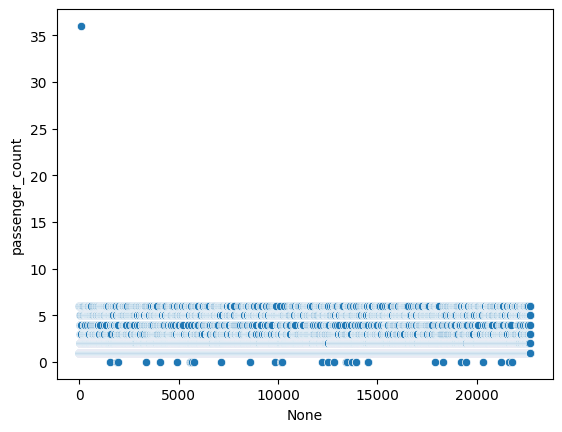

In [92]:
sns.scatterplot(x = taxi_df.index, y = taxi_df['passenger_count'])

#### 이상치 데이터 Drop

In [93]:
passenger_count_dropN = taxi_df[taxi_df['passenger_count'] == 36].index
taxi_df.drop(passenger_count_dropN, inplace = True)

### trip_distance
#### - 탑승 거리의 분포의 차이가 한번에 확 뛴것이 보임(3 -> 33)
#### - 산점도를 그려 이상치 확인

<Axes: xlabel='None', ylabel='trip_distance'>

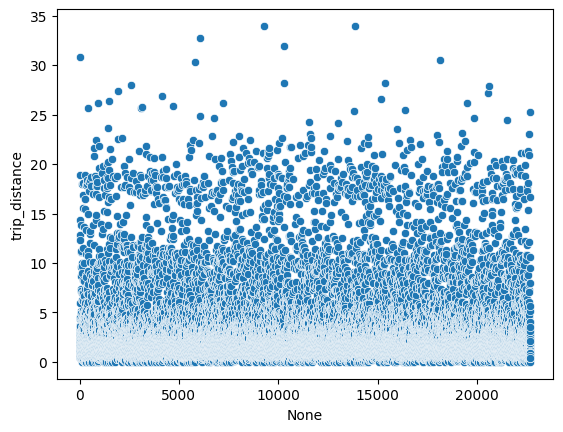

In [94]:
sns.scatterplot(x = taxi_df.index, y = taxi_df['trip_distance'])

#### 1개 이상의 표본이 있으나 탑승 거리가 25이상의 데이터 표본이 현저히 작음
#### 전체 대비 탑승 거리가 25이상의 비율을 확인

In [95]:
taxi_df[taxi_df['trip_distance'] >= 25].value_counts().sum() / len(taxi_df) * 100

0.11455258404194388

#### 데이터의 개수가 전체 대비 0.1%이므로 모델링을 위해 제거하는 것이 합리적(모델 예측이 이상치 데이터로 높게 잡힐 수 있음)

In [96]:
trip_distance_dropN = taxi_df[taxi_df['trip_distance'] >= 25].index
taxi_df.drop(trip_distance_dropN, inplace = True)

### fare_amount
#### - 택시 비용이 999인 데이터가 존재(33km를 탑승한다고 가정을 해도 이상함)
#### - 산점도를 그려 데이터 확인

<Axes: xlabel='None', ylabel='fare_amount'>

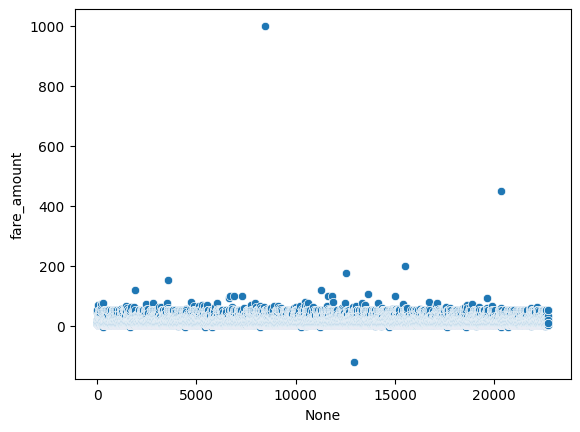

In [97]:
sns.scatterplot(x = taxi_df.index, y = taxi_df['fare_amount'])

#### 눈대중으로 보았을 때 이상치가 존재하는 것을 확인
#### 데이터의 비율이 떨어지는 구간을 찾아야 할듯?
#### < 평균을 구하기 이전 이상치를 먼저 제거해야할듯 >

#### 택시 비용이 0보다 작은 경우는 전부 이상치
#### >> Drop

In [98]:
taxi_df.drop(taxi_df[taxi_df['fare_amount'] < 0].index, inplace = True)

####  택시 요금이 999인 데이터와 또 다른 이상치로 보이는 400이상의 데이터 처리

In [99]:
taxi_df.drop(taxi_df[(taxi_df['fare_amount'] > 400)].index, inplace = True)

#### 과연 택시 요금 예측에 있어서 택시 요금이 0원인 데이터도 필요할까?
#### 택시 요금이 0원인 데이터 확인

In [100]:
taxi_df[taxi_df['fare_amount'] == 0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
4404,Mrs. Tiffany Brown DDS,12/20/2017 4:06:53 PM,12/20/2017 4:47:50 PM,Cash,1,7.06,0.0,0.0,0.0
5724,William Holland,06/12/2017 12:08:55 PM,06/12/2017 12:08:57 PM,Debit Card,1,0.00,0.0,0.0,0.0
10508,Travis Vega,03/30/2017 3:14:26 AM,03/30/2017 3:14:28 AM,Debit Card,1,0.00,0.0,0.0,0.0
19069,Glenn Garrett,07/10/2017 2:40:09 PM,07/10/2017 2:40:59 PM,Cash,1,0.10,0.0,0.0,0.0
21844,Reginald Baker,04/18/2017 4:55:29 PM,04/18/2017 6:29:44 PM,Cash,2,20.40,0.0,0.0,12.5
22568,Christine Edwards,03/07/2017 2:24:47 AM,03/07/2017 2:24:50 AM,Credit Card,1,0.00,0.0,0.0,0.0


#### trip_distance가 0이 아닌데 fare_amount가 0인 데이터 확인
#### 탑승한 거리가 있는데 택시비가 0원? >> 이상치

In [101]:
taxi_df[(taxi_df['trip_distance'] != 0) & (taxi_df['fare_amount'] == 0)]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
4404,Mrs. Tiffany Brown DDS,12/20/2017 4:06:53 PM,12/20/2017 4:47:50 PM,Cash,1,7.06,0.0,0.0,0.0
19069,Glenn Garrett,07/10/2017 2:40:09 PM,07/10/2017 2:40:59 PM,Cash,1,0.10,0.0,0.0,0.0
21844,Reginald Baker,04/18/2017 4:55:29 PM,04/18/2017 6:29:44 PM,Cash,2,20.40,0.0,0.0,12.5


In [102]:
taxi_df.drop(taxi_df[(taxi_df['trip_distance'] != 0) & (taxi_df['fare_amount'] == 0)].index, inplace = True)

#### 이상치 데이터를 제거후 산점도 그래프 그리기

<Axes: xlabel='None', ylabel='fare_amount'>

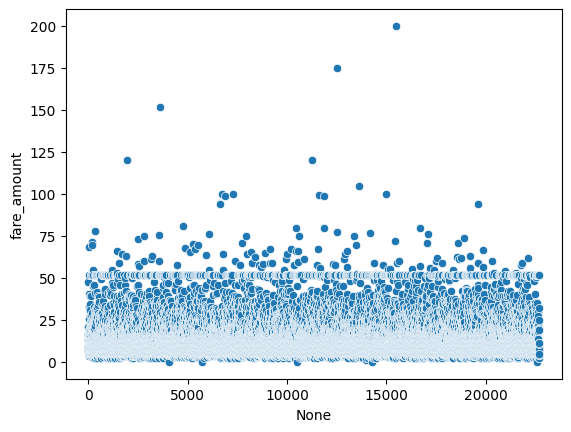

In [103]:
sns.scatterplot(x = taxi_df.index, y = taxi_df['fare_amount'])

#### 데이터의 분포도가 가장 적은 구간을 확인
#### >> 100 이상의 데이터는 데이터의 분포가 분산되어있음 > 이상치라고 생각됨
#### Drop

In [104]:
taxi_df[taxi_df['fare_amount'] > 100].value_counts().sum()

6

In [105]:
taxi_df.drop(taxi_df[(taxi_df['fare_amount'] > 100)].index, inplace = True)

In [106]:
taxi_df['fare_amount'].describe()

,fare_amount
count,22646.000000
mean,12.862579
std,10.547977
min,0.000000
25%,6.500000
50%,9.500000
75%,14.500000
max,100.000000


### 종속변수(택시 요금)가 0원인 경우도 예측하는게 맞을까?
### 택시 요금이 0원인 경우 조회

In [107]:
taxi_df[(taxi_df['fare_amount'] == 0)].value_counts().sum()

3

In [108]:
taxi_df[(taxi_df['fare_amount'] == 0)]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
5724,William Holland,06/12/2017 12:08:55 PM,06/12/2017 12:08:57 PM,Debit Card,1,0.0,0.0,0.0,0.0
10508,Travis Vega,03/30/2017 3:14:26 AM,03/30/2017 3:14:28 AM,Debit Card,1,0.0,0.0,0.0,0.0
22568,Christine Edwards,03/07/2017 2:24:47 AM,03/07/2017 2:24:50 AM,Credit Card,1,0.0,0.0,0.0,0.0


### 문제를 해결하는데 오히려 노이즈가 생길 것 같아 Drop

In [109]:
taxi_df.drop(taxi_df[(taxi_df['fare_amount'] == 0)].index, inplace = True)


----
### tip_amount
### 평균이 1.8인데 최대가 42임 >> 이상치 의심


In [110]:
taxi_df['tip_amount'].describe()

,tip_amount
count,22643.000000
mean,1.812654
std,2.379090
min,0.000000
25%,0.000000
50%,1.350000
75%,2.450000
max,42.290000


### 42의 경우는 이상치로 판별
### - 추가로 20이상의 데이터는 분포도가 적으므로 Drop

<Axes: xlabel='None', ylabel='tip_amount'>

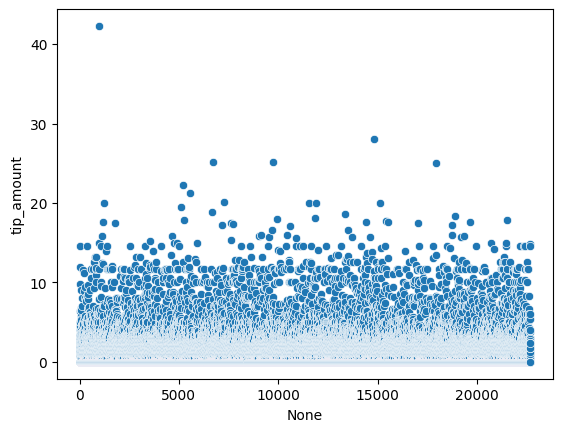

In [111]:
sns.scatterplot(x = taxi_df.index, y = taxi_df['tip_amount'])

### 추가 팁 요금이 20이상인 데이터 전부 제거(노이즈 제거 및 이상치 제거)

In [112]:
taxi_df[taxi_df['tip_amount'] > 20].value_counts().sum()

8

In [113]:
taxi_df.drop(taxi_df[taxi_df['tip_amount'] > 20].index, inplace = True)

-----
### tolls_amount

In [114]:
taxi_df['tolls_amount'].describe()

,tolls_amount
count,22635.000000
mean,0.304261
std,1.370281
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,19.100000


<Axes: xlabel='None', ylabel='tolls_amount'>

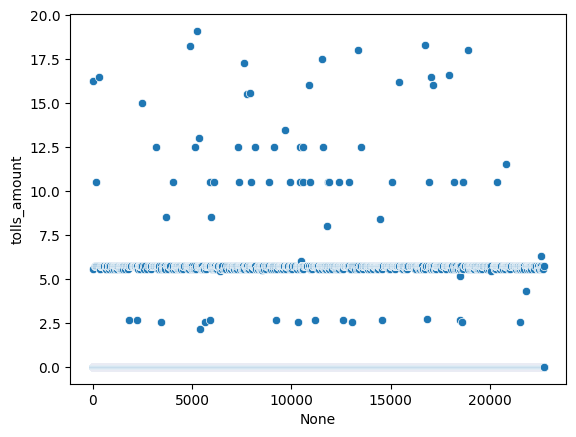

In [115]:
sns.scatterplot(x = taxi_df.index, y = taxi_df['tolls_amount'])

In [116]:
taxi_df['tolls_amount'].value_counts()

,count
tolls_amount,
0.00,21487
5.76,833
5.54,238
10.50,21
12.50,9
2.64,8
2.54,6
16.50,2
18.00,2



#### 데이터가 한쪽으로 너무 치우쳐져 있음(극단적)
#### 오히려 분석을 하면서 노이즈가 발생될 거 같아 Drop

In [117]:
taxi_df.drop('tolls_amount', axis = 1)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00
...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70


### 날짜 데이터 object -> datetime형식으로 변경

In [118]:
taxi_df['tpep_pickup_datetime'] = pd.to_datetime(taxi_df['tpep_pickup_datetime'])
taxi_df['tpep_dropoff_datetime'] = pd.to_datetime(taxi_df['tpep_dropoff_datetime'])

## 중복
### 중복된 행은 따로 없는것으로 보임

In [119]:
taxi_df[taxi_df.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,2017-08-15 19:48:08,2017-08-15 20:00:37,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,2017-02-13 16:25:41,2017-02-13 16:55:35,Cash,1,4.2,21.0,0.00,0.0


In [120]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22635 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         22635 non-null  object        
 1   tpep_pickup_datetime   22635 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22635 non-null  datetime64[ns]
 3   payment_method         22635 non-null  object        
 4   passenger_count        22635 non-null  int64         
 5   trip_distance          22635 non-null  float64       
 6   fare_amount            22635 non-null  float64       
 7   tip_amount             22635 non-null  float64       
 8   tolls_amount           22635 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(2)
memory usage: 2.2+ MB


In [121]:
taxi_df.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22635,22635,22635.000000,22635.000000,22635.000000,22635.000000,22635.000000
mean,2017-06-29 06:59:53.054296320,2017-06-29 07:16:47.310934016,1.642412,2.881796,12.847160,1.804045,0.304261
min,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,0.010000,0.000000,0.000000
25%,2017-03-30 01:50:28,2017-03-30 01:58:45,1.000000,0.990000,6.500000,0.000000,0.000000
50%,2017-06-23 13:06:15,2017-06-23 13:13:47,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2017-10-02 10:34:34,2017-10-02 10:53:47,2.000000,3.040000,14.500000,2.450000,0.000000
max,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,24.890000,100.000000,20.000000,19.100000
std,NaN,NaN,1.285307,3.544090,10.499071,2.331775,1.370281


### Credit Card, Debit Card -> Card로 통합

In [122]:
taxi_df['payment_method'].unique()

array(['Debit Card', 'Cash', 'Credit Card'], dtype=object)

In [123]:
taxi_df['payment_method'] = taxi_df['payment_method'].apply(lambda x : 'Card' if x != 'Cash' else x)

In [124]:
taxi_df

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Card,1,2.36,10.5,1.70,0.00
